# Feature selection 

In [2]:
 #shuffled
    
    
import pandas as pd
import boto3
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Create a boto3 session
session = boto3.Session(region_name='us-east-2')

bucket_name = 'multiclass-balanced-two-million'
object_key = 'merged-multiclass-balanced-two-million.csv'
s3_client = session.client('s3')

# Get the CSV file from S3
obj = s3_client.get_object(Bucket=bucket_name, Key=object_key)

# Read the data into a pandas DataFrame
df = pd.read_csv(BytesIO(obj['Body'].read()))

# Shuffle the DataFrame to ensure the data is not ordered
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels
X = df.iloc[:, :-2]  # All rows, exclude the last two columns
y = df.iloc[:, -1]   # All rows, only the last column

# Encode string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier()

# Fit the model on your training data
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model Accuracy: {accuracy}")

# Get feature importances
importances = model.feature_importances_

# Optionally, sort and print the feature importances
sorted_idx = importances.argsort()[::-1]
# Get feature names from the DataFrame
feature_names = X.columns

# Print the feature names along with their importances
for index in sorted_idx:
    print(f"{feature_names[index]}: Importance: {importances[index]:.10f}")


Model Accuracy: 0.9999995833333334
mode_payload_bytes_delta_len: Importance: 0.3561118543
mode_fwd_packets_delta_len: Importance: 0.2490577996
mean_bwd_payload_bytes_delta_len: Importance: 0.1416890472
cov_bwd_header_bytes_delta_len: Importance: 0.0631530881
mode_packets_delta_len: Importance: 0.0412659645
cov_bwd_packets_delta_len: Importance: 0.0316184014
active_skewness: Importance: 0.0237915106
median_bwd_packets_delta_len: Importance: 0.0197679643
bwd_payload_bytes_skewness: Importance: 0.0156153096
mean_bwd_packets_delta_len: Importance: 0.0149755273
mode_bwd_payload_bytes_delta_len: Importance: 0.0124270348
fwd_total_header_bytes: Importance: 0.0121763973
median_fwd_payload_bytes_delta_len: Importance: 0.0063821068
skewness_bwd_header_bytes_delta_len: Importance: 0.0045043170
active_min: Importance: 0.0033286056
mode_fwd_payload_bytes_delta_len: Importance: 0.0031334097
fin_flag_counts: Importance: 0.0009528836
mean_fwd_packets_delta_len: Importance: 0.0000436207
payload_bytes_s

In [4]:
# Pair feature names with their importances
feature_importances = [(feature, importance) for feature, importance in zip(feature_names, importances)]

# Sort the features by their importance
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Initialize the list to hold feature names with importance greater than 0.0000000001
features_more_than_0_10 = []

# Iterate through the sorted features and add the names to the list
for feature_name, importance in sorted_feature_importances:
    if importance > 0.0000000001:
        features_more_than_0_10.append(feature_name)

# Print just the names of the features in order
for feature_name in features_more_than_0_10:
    print(feature_name)

# Print the total number of features with importance more than 0.0000000001
print(f"Number of features with importance more than 0.0000000001: {len(features_more_than_0_10)}")


mode_payload_bytes_delta_len
mode_fwd_packets_delta_len
mean_bwd_payload_bytes_delta_len
cov_bwd_header_bytes_delta_len
mode_packets_delta_len
cov_bwd_packets_delta_len
active_skewness
median_bwd_packets_delta_len
bwd_payload_bytes_skewness
mean_bwd_packets_delta_len
mode_bwd_payload_bytes_delta_len
fwd_total_header_bytes
median_fwd_payload_bytes_delta_len
skewness_bwd_header_bytes_delta_len
active_min
mode_fwd_payload_bytes_delta_len
fin_flag_counts
mean_fwd_packets_delta_len
payload_bytes_std
bwd_total_payload_bytes
max_header_bytes_delta_len
median_fwd_header_bytes_delta_len
fwd_init_win_bytes
min_fwd_payload_bytes_delta_len
bwd_payload_bytes_median
payload_bytes_mean
min_fwd_packets_delta_len
bwd_init_win_bytes
bwd_avg_segment_size
bwd_packets_IAT_mean
variance_fwd_payload_bytes_delta_len
total_payload_bytes
fwd_ack_flag_counts
fwd_max_header_bytes
bwd_packets_count
median_fwd_packets_delta_len
bwd_payload_bytes_variance
std_header_bytes
cov_header_bytes
bwd_min_header_bytes
psh_fl

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot the first tree
xgb.plot_tree(model, num_trees=0)
plt.show()

# Plot the 50th tree (if your model has at least 50 trees)
xgb.plot_tree(model, num_trees=49)
plt.show()

### Correlation Coefficient between selected features(Multiclass)

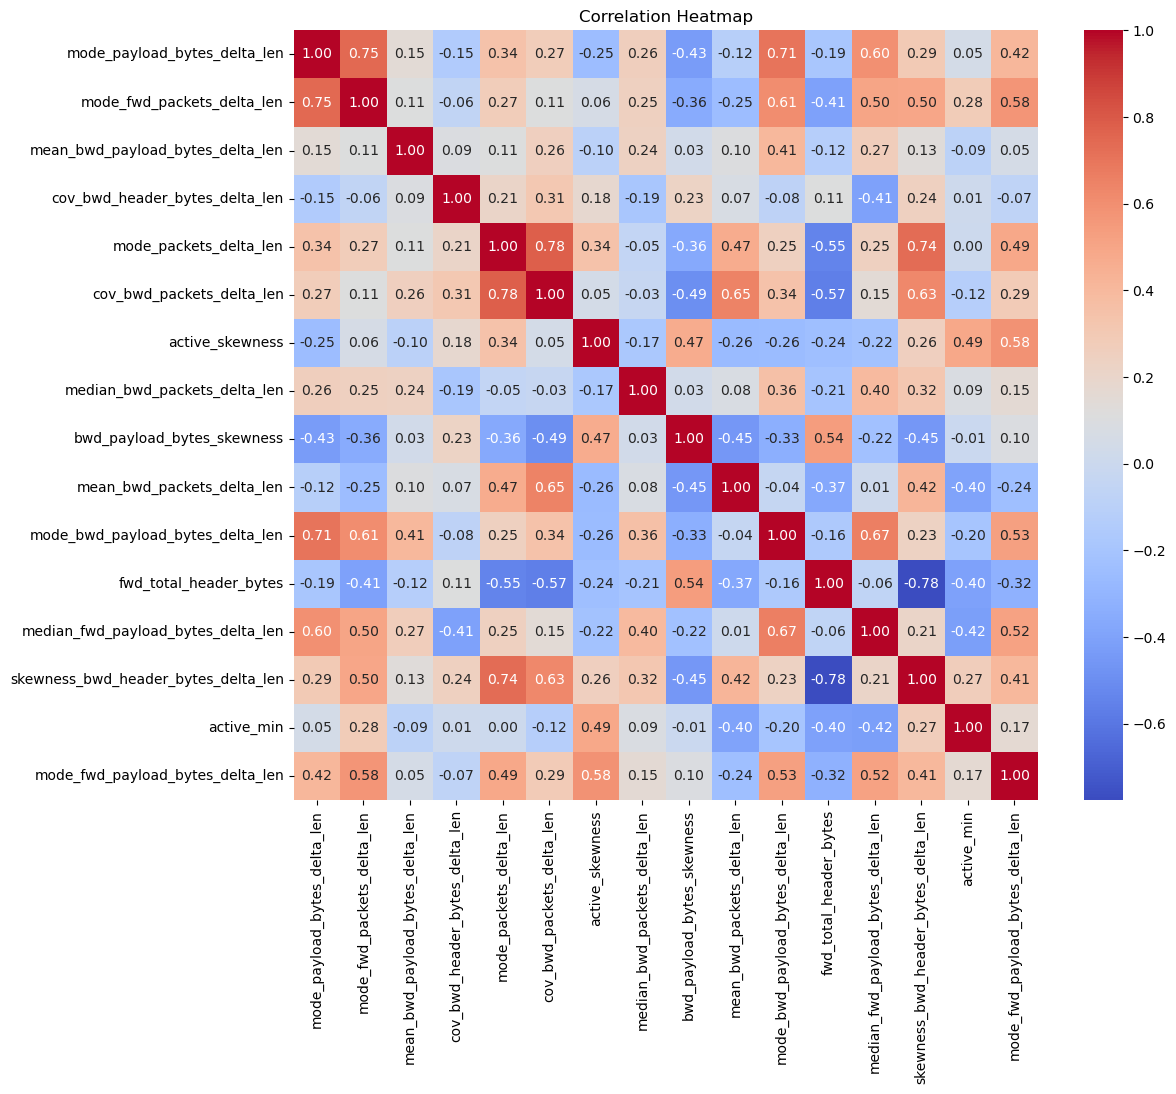

In [2]:
pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install graphviz


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import boto3
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# Create a boto3 session
session = boto3.Session(region_name='us-east-2')

bucket_name = 'multiclass-balanced-two-million'
object_key = 'merged-multiclass-balanced-two-million.csv'
s3_client = session.client('s3')

# Get the CSV file from S3
obj = s3_client.get_object(Bucket=bucket_name, Key=object_key)

# Read the data into a pandas DataFrame
df = pd.read_csv(BytesIO(obj['Body'].read()))

# Shuffle the DataFrame to ensure the data is not ordered
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled DataFrame to a CSV file in the local directory
# df.to_csv('shuffled_data.csv', index=False)

# Separate features and labels
X = df.iloc[:, :-2]  # All rows, exclude the last two columns
y = df.iloc[:, -1]   # All rows, only the last column

# Encode string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier()

# Fit the model on your training data
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Print the metrics
print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Get and print feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by the 'Importance' column in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("\nSorted Feature Importances:")
print(feature_importances_df)

# Save the sorted feature importances to a separate CSV file
feature_importances_df.to_csv('sorted_feature_importances.csv', index=False)


Model Accuracy: 0.9999995833333334
Precision: 0.9999995837371083
Recall: 0.9999995831061262
F1 Score: 0.9999995834210966

Sorted Feature Importances:
                              Feature  Importance
269      mode_payload_bytes_delta_len    0.356112
239        mode_fwd_packets_delta_len    0.249058
275  mean_bwd_payload_bytes_delta_len    0.141689
258    cov_bwd_header_bytes_delta_len    0.063153
223            mode_packets_delta_len    0.041266
..                                ...         ...
127      psh_flag_percentage_in_total    0.000000
128      urg_flag_percentage_in_total    0.000000
129      ece_flag_percentage_in_total    0.000000
131      ack_flag_percentage_in_total    0.000000
113               fwd_ece_flag_counts    0.000000

[289 rows x 2 columns]


In [5]:
import boto3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# AWS S3 session setup
# session = boto3.Session(region_name='us-east-2')
# s3_client = session.client('s3')
# bucket_name = 'multiclass-balanced-two-million'
# object_key = 'merged-multiclass-balanced-two-million.csv'

# Selected features
selected_features = [
    'mode_payload_bytes_delta_len', 'mode_fwd_packets_delta_len',
    'mean_bwd_payload_bytes_delta_len', 'cov_bwd_header_bytes_delta_len',
    'mode_packets_delta_len', 'cov_bwd_packets_delta_len',
    'active_skewness', 'median_bwd_packets_delta_len',
    'bwd_payload_bytes_skewness', 'mean_bwd_packets_delta_len',
    'mode_bwd_payload_bytes_delta_len', 'fwd_total_header_bytes',
    'median_fwd_payload_bytes_delta_len', 'skewness_bwd_header_bytes_delta_len',
    'active_min', 'mode_fwd_payload_bytes_delta_len'
]

# Reading dataset from S3
# obj = s3_client.get_object(Bucket=bucket_name, Key=object_key)
# df = pd.read_csv(obj['Body'])





# Filtering dataset for selected features
df_filtered = X_train[selected_features]

# Calculating correlation matrix
corr_matrix = df_filtered.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')

# Saving the heatmap to files
plt.savefig('correlation_heatmap.jpg', dpi=300)  # Save as JPG
plt.savefig('correlation_heatmap.pdf', format='pdf')  # Save as PDF

plt.close()  # Close the figure to prevent it from displaying in the notebook


In [ ]:
mport boto3
import pandas as pd

# Initialize S3 client
s3 = boto3.client('s3')

# Define bucket and file paths
bucket_name = 'cleaned-normalized'
file_path = '10_M_clean_binary_timebased_Bots_Gagfyt_60_1_bot.csv'
output_file_path = 'first_100000_rows.csv'



# Read the first 100,000 rows directly from S3 and save to CSV
response = s3.get_object(Bucket=bucket_name, Key=file_path)
first_100000_rows = pd.read_csv(response['Body'], nrows=100000)
first_100000_rows.to_csv(output_file_path, index=False)

print("First 100,000 rows saved to", output_file_path)